# **Final project** 

### **Dataset description**

* `Host related columns`:

host_id,
host_name,
host_since,
host_location,
host_about,
host_response_time,
host_response_rate,
host_acceptance_rate,
host_is_superhost,
host_thumbnail_url,
host_picture_url,
host_neighbourhood,
host_listings_count,
host_total_listings_count,
host_verifications,
host_has_profile_pic,
host_identity_verified,
host_url.

* `Property and room features`:
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities

* `Location based columns`:
latitude
longitude
zipcode
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
country
country_code
market
smart_location

* `Price and cost fields`:

price
weekly_price
monthly_price
security_deposit
cleaning_fee
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped

* `Review metrics`:

number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
reviews_per_month

* `Metadata and URLs`:
id
name
listing_url
description
summary
space
neighborhood_overview
picture_url
calendar_updated
scrape_id
last_scraped
source
license

* `Experience and Misc`:
experiences_offered
is_location_exact
requires_license
instant_bookable
is_business_travel_ready




### **Importing main libraries**

In [70]:
!pip install textblob keybert scikit-learn folium plotly

In [71]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob 


### **Data inspection**

In [72]:
df = pd.read_csv('listings.csv')
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36121,https://www.airbnb.com/rooms/36121,20250301213336,2025-03-03,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,https://a0.muscache.com/pictures/8776354/35b32...,62165,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,36647,https://www.airbnb.com/rooms/36647,20250301213336,2025-03-03,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",https://a0.muscache.com/pictures/miso/Hosting-...,157798,...,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,38663,https://www.airbnb.com/rooms/38663,20250301213336,2025-03-02,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",https://a0.muscache.com/pictures/miso/Hosting-...,165789,...,4.88,4.86,4.62,OSE-STRREG-0001784,f,1,0,1,0,0.28
3,38833,https://www.airbnb.com/rooms/38833,20250301213336,2025-03-03,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,https://a0.muscache.com/pictures/7554f9e5-4ab0...,166532,...,4.96,4.79,4.82,OSE-STRREG-0000476,f,1,1,0,0,1.36
4,39282,https://www.airbnb.com/rooms/39282,20250301213336,2025-03-02,city scrape,“Work-from-home” from OUR home.,*Monthly Discount will automatically apply <br...,THE NEIGHBORHOOD:<br />Our apartment is locate...,https://a0.muscache.com/pictures/ef8f43ad-d967...,168525,...,4.88,4.85,4.78,OSE-STRREG-0001150,f,2,0,2,0,1.54


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37434 entries, 0 to 37433
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37434 non-null  int64  
 1   listing_url                                   37434 non-null  object 
 2   scrape_id                                     37434 non-null  int64  
 3   last_scraped                                  37434 non-null  object 
 4   source                                        37434 non-null  object 
 5   name                                          37432 non-null  object 
 6   description                                   36441 non-null  object 
 7   neighborhood_overview                         20224 non-null  object 
 8   picture_url                                   37433 non-null  object 
 9   host_id                                       37434 non-null 

In [74]:
# listing all columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

* I can't tell the diff between host_listings_count and host_total_listings_count. I think one of them could be dropped?

In [75]:
# getting all unique values for host_listings_count
df['host_listings_count'].unique()

array([1.000e+00, 2.000e+00, 7.000e+00, 4.000e+00, 3.000e+00, 6.000e+00,
       5.000e+00, 1.100e+01, 2.900e+01, 1.500e+01, 1.300e+01, 1.400e+01,
       9.000e+00, 2.500e+01,       nan, 1.700e+01, 8.000e+00, 2.400e+01,
       1.900e+01, 1.200e+01, 2.200e+01, 2.640e+02, 3.900e+01, 1.000e+01,
       3.100e+01, 7.600e+01, 6.800e+01, 2.100e+01, 3.000e+01, 1.600e+01,
       6.190e+02, 3.030e+02, 2.000e+01, 1.770e+02, 1.760e+02, 2.100e+02,
       5.200e+01, 1.800e+01, 4.500e+01, 2.130e+02, 3.500e+01, 5.500e+01,
       2.700e+01, 4.800e+01, 8.300e+01, 1.154e+03, 5.255e+03, 6.200e+02,
       6.300e+01, 4.700e+01, 2.790e+02, 2.560e+02, 1.870e+02, 3.800e+01,
       8.000e+01, 1.100e+02, 6.500e+01, 3.400e+01, 3.970e+02, 4.100e+01,
       2.700e+02, 1.250e+02, 4.900e+01, 9.700e+01, 1.460e+02, 2.800e+01,
       9.900e+01, 7.960e+02, 4.290e+02, 8.600e+01, 1.650e+02, 1.340e+02,
       3.200e+01, 4.200e+01, 5.000e+01, 4.000e+01, 6.920e+02, 1.081e+03,
       8.200e+01, 6.060e+02, 5.300e+01, 8.100e+01, 

In [76]:
# getting all unique values for total_host_listings_count
df['host_total_listings_count'].unique()

array([3.000e+00, 1.000e+00, 2.000e+00, 9.000e+00, 6.000e+00, 4.000e+00,
       5.000e+00, 1.100e+01, 1.300e+01, 7.000e+00, 4.000e+01, 2.000e+01,
       1.200e+01, 2.300e+01, 1.700e+01, 1.000e+01, 3.700e+01, 8.000e+00,
       1.400e+01, 2.900e+01, 4.500e+01,       nan, 1.600e+01, 1.500e+01,
       2.800e+01, 5.800e+01, 2.100e+01, 2.600e+01, 5.200e+01, 1.800e+01,
       3.980e+02, 7.600e+01, 3.100e+01, 2.700e+01, 2.200e+01, 1.900e+01,
       8.200e+01, 7.000e+01, 3.500e+01, 3.800e+01, 1.974e+03, 3.550e+02,
       4.300e+01, 1.940e+02, 3.540e+02, 1.255e+03, 6.800e+01, 1.106e+03,
       5.100e+01, 6.400e+01, 4.700e+01, 1.047e+03, 5.900e+01, 1.070e+02,
       4.200e+01, 3.000e+01, 9.400e+01, 8.600e+01, 1.344e+03, 5.458e+03,
       1.548e+03, 2.400e+01, 9.200e+01, 3.660e+02, 3.140e+02, 2.830e+02,
       1.032e+03, 7.640e+02, 4.400e+01, 1.200e+02, 1.230e+02, 3.600e+01,
       5.210e+02, 6.700e+01, 4.100e+01, 9.300e+01, 2.840e+02, 1.650e+02,
       7.100e+01, 5.600e+01, 1.310e+02, 1.670e+02, 

In [77]:
# getting all values for neighboorhood
df['neighbourhood'].unique()

array(['Neighborhood highlights', nan], dtype=object)

* Neighbourhood should be dropped

In [78]:
# getting all values for neighbourhood_cleansed
df['neighbourhood_cleansed'].unique()

array(['Prospect Heights', 'East Harlem', 'Boerum Hill', 'Harlem',
       'Williamsburg', "Hell's Kitchen", 'Midtown', 'Fort Greene',
       'Bedford-Stuyvesant', 'Sunnyside', 'Crown Heights', 'Clinton Hill',
       'Chelsea', 'Washington Heights', 'Gowanus', 'West Village',
       'Lower East Side', 'Carroll Gardens', 'Flatbush', 'East Village',
       'Greenpoint', 'Ridgewood', 'Mott Haven', 'Morningside Heights',
       'Rockaway Beach', 'Park Slope', 'Upper East Side', 'Kips Bay',
       'Ditmars Steinway', 'Middle Village', 'Astoria', 'Jamaica',
       'South Slope', 'Brooklyn Heights', 'Upper West Side',
       'East Flatbush', 'Greenwich Village', 'Bushwick', 'Chinatown',
       'Emerson Hill', 'Bensonhurst', 'Clason Point', 'Eastchester',
       'Windsor Terrace', 'Gravesend', 'Shore Acres', 'Nolita',
       'Vinegar Hill', 'Kingsbridge', 'Gramercy', 'Sheepshead Bay',
       'Long Island City', 'Sunset Park', 'Prospect-Lefferts Gardens',
       'Downtown Brooklyn', 'Little Ital

* Now what is the deal with 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm'? Something can be dropped from here if there is redundancy.

In [79]:
# getting all unique values for maximum_maximum_nights
df['maximum_maximum_nights'].unique()

array([3.65000000e+02, 9.99000000e+02, 6.00000000e+01, 1.12500000e+03,
       4.50000000e+01, 1.20000000e+02, 1.80000000e+02, 1.50000000e+02,
       9.00000000e+01, 4.00000000e+01, 3.00000000e+01, 2.40000000e+02,
       7.30000000e+02, 3.10000000e+01, 3.00000000e+03, 1.00000000e+02,
       3.60000000e+02, 5.90000000e+01, 7.50000000e+01, 2.90000000e+01,
       2.50000000e+01, 4.80000000e+02, 6.80000000e+01, 2.50000000e+02,
       2.80000000e+01, 2.70000000e+02, 3.20000000e+01, 1.00000000e+03,
       8.90000000e+01, 2.00000000e+02, 5.18000000e+02, 7.60000000e+02,
       3.00000000e+02, 1.01000000e+02, 1.00000000e+01, 7.00000000e+01,
       6.10000000e+01, 3.30000000e+02, 4.10000000e+01, 1.60000000e+02,
       2.10000000e+02, 4.20000000e+01, 1.40000000e+02, 3.50000000e+01,
       7.00000000e+00, 9.60000000e+01, 4.00000000e+02, 8.00000000e+02,
       4.90000000e+02, 1.60000000e+01, 2.18000000e+02, 1.30000000e+02,
       2.10000000e+01, 1.22000000e+02, 1.84000000e+02, 9.00000000e+02,
      

In [80]:
# getting all unique values for maximum_minimum_nights
df['maximum_minimum_nights'].unique()

array([9.000e+01, 3.000e+01, 3.000e+00, 2.000e+00, 4.000e+00, 3.100e+01,
       7.000e+00, 6.000e+01, 1.800e+02, 1.000e+00, 5.000e+00, 1.810e+02,
       4.800e+01, 3.650e+02, 7.500e+01, 1.500e+02, 4.900e+01, 5.000e+01,
       3.700e+02, 1.000e+03, 8.500e+01, 8.000e+01, 5.800e+01, 2.650e+02,
       3.000e+02, 4.000e+01, 1.000e+02, 8.900e+01, 5.600e+01, 6.500e+01,
       2.700e+02, 4.500e+01, 2.000e+02, 2.730e+02, 1.124e+03, 1.200e+02,
       2.400e+02, 5.500e+01, 7.000e+01, 5.900e+01, 6.000e+00, 1.250e+03,
       1.980e+02, 6.600e+01, 5.000e+02, 2.100e+02, 3.500e+01, 4.200e+01,
       3.600e+02, 4.800e+02, 9.900e+01, 7.400e+01, 9.500e+01, 1.860e+02,
       1.190e+02, 1.790e+02, 6.800e+01, 3.660e+02, 1.830e+02, 3.200e+01,
       3.640e+02, 4.600e+01, 9.100e+01, 1.400e+01, 2.990e+02, 4.000e+02,
       3.370e+02, 5.200e+01, 1.080e+02, 8.600e+01, 1.850e+02, 1.330e+02,
       3.590e+02, 2.220e+02, 3.350e+02, 3.340e+02, 1.000e+01, 1.510e+02,
       9.200e+01, 8.000e+00, 1.840e+02, 1.530e+02, 

* Don't know what this means: 'availability_eoy'

In [81]:
# checking for unique values in avaliability_eoy
df['availability_eoy'].unique()

array([301, 143, 267,  25,  38, 305, 304, 113,  83, 204,   0, 129,  91,
       160,  85,  48, 116, 173,  89, 303,  77,  30,  50, 243,  90, 146,
       118, 257,  84, 139, 220,  57, 177, 294, 203, 240,  88, 166,  20,
       155, 112,  71, 150,  59, 297, 213,  33, 181, 180, 153, 298, 244,
        92, 232, 156, 183, 239, 152, 281,  41, 245,  14,  76, 279, 122,
       163,  21,  45,  65, 215,  32, 270,  87, 255,   2,   4, 107,  61,
       269, 277,   1, 235, 212,  52, 237, 275, 227, 274,   9, 184, 302,
       241, 295, 159, 264, 178, 179, 216, 124, 256, 254, 169, 233,  70,
       109,  23, 189, 192, 238,  75,  94, 265, 193, 136, 211,  42, 198,
       276, 221,  96, 246, 199, 114, 263, 185, 289, 186, 290,  17, 151,
       137, 171, 170,  73,  35, 247, 154,  44,  58,  40,  82, 104, 121,
       268, 291, 175, 299, 206, 273,  12, 210,  62, 251, 296, 272, 197,
       149, 123, 102,  56, 248, 126, 205,  93, 119,  43, 145,  60, 135,
       207, 214, 292, 194, 182,  95, 100, 101, 223,  74, 222,  3

* This only has 2 vals, I'll drop it also.

In [82]:
# checking for unique values in calendar_last_scraped
df['calendar_last_scraped'].unique()

array(['2025-03-03', '2025-03-02'], dtype=object)

* Again there might be redundancy here: 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly'. I think that if number_of_reviews means the total number of reviews we can only keep this one. The other ones are not really relevant unless the analysis goes in that direction :)

* I think the estimated_occupancy_l365d column means the number of days in the last year when the property was booked/occupied? I would VERY MUCH like to drop it :)

In [83]:
# checking the unique values for estimated_occupancyl365d
df['estimated_occupancy_l365d'].unique()

array([  0, 255, 154, 180,  60, 124, 168, 120,  62, 240,  56, 192, 141,
       186, 205, 179,  13,  38, 115,  51,  26, 102, 218, 170, 243,  64,
       128,  42, 130, 150,  98, 220, 230,  77, 166,  90,  28, 248, 210,
       140, 160, 118,  84,  92,  70, 238, 252, 114,  14, 236,  80, 126,
        48, 112, 216, 234,  74, 200,  20, 100, 182])

* This column feels relevant BUT I think this can be preprocessed to a has_licence column (nans become 0s and the rest of them become 1s), assuming that the nans in this column mean that the property has no licence. 
UPDATE: According to CHAT GPT in some cities Airbnb hosts are required by law to register and obtain a licence before they can legally rent their property. The licence field is optional in many regions, so for many listings it's simply NaN. This means that:
    - license depends on the location
    - engineering the has_licence feature would extract the meaningful structure of it in a way that supports our analysis

In [84]:
# chacking unique values for license
df['license'].unique()

array([nan, 'OSE-STRREG-0001784', 'OSE-STRREG-0000476', ...,
       'OSE-STRREG-0002922', 'OSE-STRREG-0002813', 'OSE-STRREG-0002894'],
      dtype=object)

* Does reviews_per_month mean average number of reviews per month or something else?

In [85]:
# checking unique values for reviews_per_month
df['reviews_per_month'].unique()

array([5.0000e-02, 5.8000e-01, 2.8000e-01, 1.3600e+00, 1.5400e+00,
       2.5000e-01, 2.6000e-01, 1.0100e+00, 3.0000e-02, 1.3400e+00,
       7.0000e-02, 2.1600e+00, 2.0000e-01, 1.0300e+00, 9.5000e-01,
       1.1000e-01, 8.9000e-01, 7.4000e-01, 2.3000e-01, 2.1000e-01,
       1.9100e+00, 3.9000e-01, 1.2500e+00, 4.0000e-02, 1.3200e+00,
       7.1000e-01, 3.1000e-01, 4.5000e-01,        nan, 1.7000e+00,
       4.3000e-01, 9.7000e-01, 2.9000e-01, 3.3000e-01, 4.4200e+00,
       8.0000e-02, 7.8000e-01, 1.6900e+00, 1.0000e-01, 2.8100e+00,
       2.1100e+00, 1.0000e-02, 1.0700e+00, 1.6500e+00, 4.2000e-01,
       1.7000e-01, 1.6000e+00, 1.5800e+00, 3.0000e-01, 9.0000e-01,
       1.4700e+00, 3.8000e-01, 9.0000e-02, 3.2000e-01, 6.1000e-01,
       1.9000e-01, 1.1000e+00, 6.8000e-01, 8.3000e-01, 5.2000e-01,
       1.1200e+00, 3.5000e-01, 1.7400e+00, 9.4000e-01, 1.7700e+00,
       1.1800e+00, 2.6700e+00, 1.4000e-01, 2.4000e-01, 1.5700e+00,
       1.1700e+00, 2.7000e-01, 1.3000e-01, 1.8000e-01, 7.5000e

* I assume this means false and true, this would need some preprocessing into binary, but it has so many missing vals :( I'll see what I can do with it

In [86]:
# checking the unique values for instant_bookable
df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

`To drop`: id, listing_url, scrape_id, last_scraped, source, host_neighbourhood, picture_url, host_id, host_name, host_location, host_about, host_thumbnail_url, host_picture_url, host_has_profile_pic, host_neighbourhood, host_url, host_response_time    host_response_rate, host_acceptance_rate, bathrooms_text, neighbourhood, calendar_updated, calendar_last_scraped, estimated_occupancy_l365d

In [87]:
# list of columns to drop
# These columns are not useful for our analysis and will be dropped
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'host_neighbourhood', 'picture_url', 'host_id', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', 'host_neighbourhood', 'host_url', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'bathrooms_text', 'neighbourhood', 'calendar_updated', 'calendar_last_scraped', 'estimated_occupancy_l365d']

In [88]:
df.drop(columns=columns_to_drop, inplace=True)
# checking the columns after dropping
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_since',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_revenue_l365d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_

### **Dealing with missing values**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37434 entries, 0 to 37433
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          37432 non-null  object 
 1   description                                   36441 non-null  object 
 2   neighborhood_overview                         20224 non-null  object 
 3   host_since                                    37396 non-null  object 
 4   host_is_superhost                             36994 non-null  object 
 5   host_listings_count                           37396 non-null  float64
 6   host_total_listings_count                     37396 non-null  float64
 7   host_verifications                            37396 non-null  object 
 8   host_identity_verified                        37396 non-null  object 
 9   neighbourhood_cleansed                        37434 non-null 

In [90]:
# printing the columns that have more than 0 missing values
missing_columns = df.columns[df.isna().any()].tolist()
print("Columns with missing values:", missing_columns)

# printing missing values in order of the number of missing values
missing_values = df[missing_columns].isna().sum().sort_values(ascending=False)
print("Missing values in each column:\n", missing_values)

Columns with missing values: ['name', 'description', 'neighborhood_overview', 'host_since', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'estimated_revenue_l365d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']
Missing values in each column:
 license                        32065
neighborhood_overview          17210
price                          15126
estimated_revenue_l365d        15126
beds                           15082
bathrooms                      14931
review_scores_location         11805
revi

* `license`

In [91]:
# creating binary column: 1 id the license is not NaN, 0 if it is NaN
df['has_license'] = df['license'].apply(lambda x: 1 if pd.notna(x) else 0)

# print the first 5 rows of the new column
print(df['has_license'].head())

# checking the unique values for the new column
print(df['has_license'].unique())

# getting the index of license column
license_index = df.columns.get_loc('license')

# moving the has_license column after the license column
df.insert(license_index + 1, 'has_license', df.pop('has_license'))

# dropping the license column
df.drop(columns=['license'], inplace=True)

0    0
1    0
2    1
3    1
4    1
Name: has_license, dtype: int64
[0 1]


In [92]:
!pip install missingno
import missingno as msno

Columns with missing values between 11780 and 17210: ['neighborhood_overview', 'bathrooms', 'beds', 'price', 'estimated_revenue_l365d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


<Axes: >

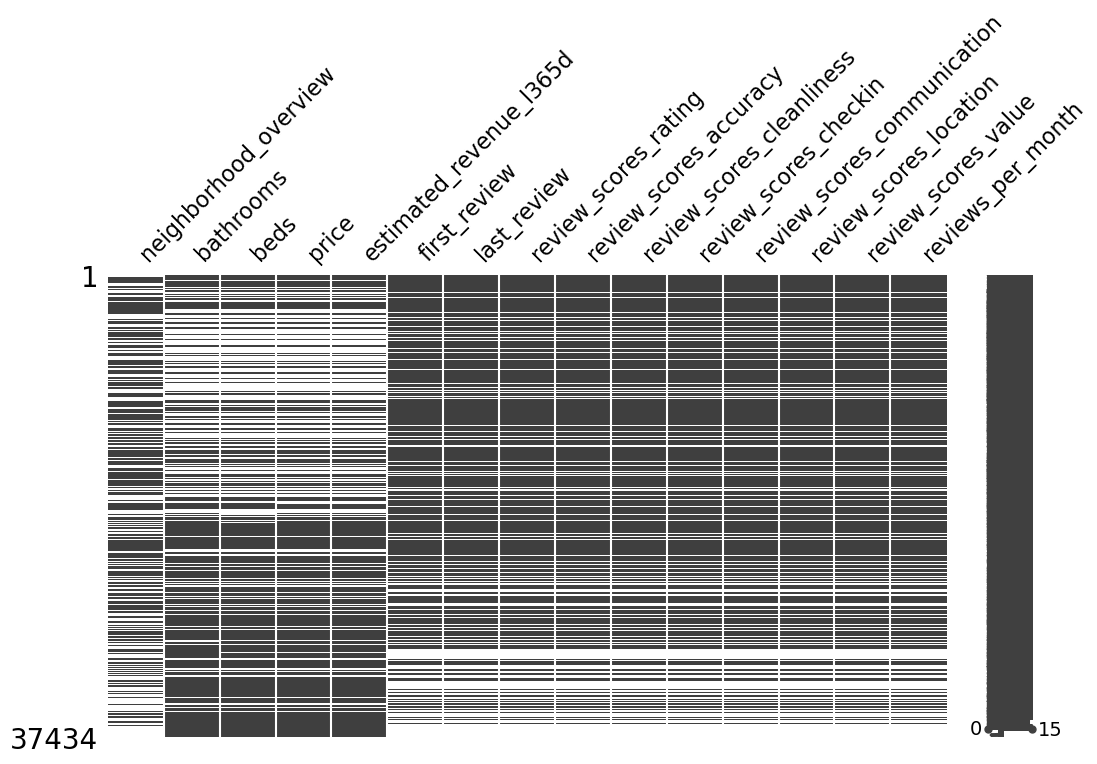

In [93]:
# getting the columns that have between 17210 and 11780 missing values
subset1_columns = df.columns[df.isna().sum().between(11780, 17210)].tolist()
print("Columns with missing values between 11780 and 17210:", subset1_columns)

# creating a subset of the dataframe with the columns that have between 11780 and 17210 missing values
subset1 = df[subset1_columns]

# visualising the missing values in the subset1 dataframe
msno.matrix(subset1, figsize=(12, 6))

# Neighbourhood

### ok so description needs a cleaning with [.<br />An 8-minute walk to ] this kind of html format. has 900 missing values that can be dropped and then maybe use naive-bayes classifier to assign good place:badplace or some other description that is shorter than the full one.

### Same thing with neighborhood_overview

### Neighbourhood_cleansed can be used for plotting since it contians names of areas. there are same neighbourhoods as host_neighbourhood.



# Preprocessing

## Identify the variable 

## 1) categorical -> nominal, ordinal. does it need encoding and what type of encoding is needed.

## 2) identify the numerical values (continous, discrete), importance of them in predictions, identify missing values in numerical values, think of ways to fill them. write the missing value implacements with reasoning and identofy dependencies between them.

## 3) Check out the unique values in each column, maybe there are some other types of variables or numpy nans. 

## 4) Figure out the relationships between variables, what is depended on what and think of Techniques for rempalcement or feature engineering.

## 5) Modify column names because they are too long, assign reasonable names.

## 6) Dive into the features themselves, for example: is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?

## Potential Research Questions

### Price determinants: Which factors (location, room type, number of reviews, amenities) most strongly relate to  nightly price?

### Host activity: Do more experienced hosts (higher host_listings_count) charge differently or receive more reviews?

### Demand seasonality: Is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?

### Review impact: How do review metrics (number_of_reviews, reviews_per_month, review_scores_rating) correlate with price and occupancy?

#### Listing characteristics: Are certain property types (e.g. entire home vs private room) more common in specific neighborhoods or price tiers?

# Preprocessing

### Since there are 37K rows and 79 columns, Let's drop the rows of those features that hava the missing count of 15K. It would have been better to check if the data is MAR or MCAR but in this case the number of missing rows is the thing i took into account and decided to drop them, becasue this is AirBnb real world data and simply predictiong the missing values or imputing them in any way would be unreasonable.
### Also the type of rows taht are missing are from the most importnant features in the dataset like: price, bathrooms, beds, estimated revenue, neighbourhood.Dropping the rows from this features will not have that much of an importance to the other attributes since they are the important ones.

## Strip the categorical columns that contain description or large texts so that cleaning process won't begin to have issues.

In [94]:
df['host_listings_count'].unique()


array([1.000e+00, 2.000e+00, 7.000e+00, 4.000e+00, 3.000e+00, 6.000e+00,
       5.000e+00, 1.100e+01, 2.900e+01, 1.500e+01, 1.300e+01, 1.400e+01,
       9.000e+00, 2.500e+01,       nan, 1.700e+01, 8.000e+00, 2.400e+01,
       1.900e+01, 1.200e+01, 2.200e+01, 2.640e+02, 3.900e+01, 1.000e+01,
       3.100e+01, 7.600e+01, 6.800e+01, 2.100e+01, 3.000e+01, 1.600e+01,
       6.190e+02, 3.030e+02, 2.000e+01, 1.770e+02, 1.760e+02, 2.100e+02,
       5.200e+01, 1.800e+01, 4.500e+01, 2.130e+02, 3.500e+01, 5.500e+01,
       2.700e+01, 4.800e+01, 8.300e+01, 1.154e+03, 5.255e+03, 6.200e+02,
       6.300e+01, 4.700e+01, 2.790e+02, 2.560e+02, 1.870e+02, 3.800e+01,
       8.000e+01, 1.100e+02, 6.500e+01, 3.400e+01, 3.970e+02, 4.100e+01,
       2.700e+02, 1.250e+02, 4.900e+01, 9.700e+01, 1.460e+02, 2.800e+01,
       9.900e+01, 7.960e+02, 4.290e+02, 8.600e+01, 1.650e+02, 1.340e+02,
       3.200e+01, 4.200e+01, 5.000e+01, 4.000e+01, 6.920e+02, 1.081e+03,
       8.200e+01, 6.060e+02, 5.300e+01, 8.100e+01, 

In [95]:
# Strip whitespace and convert prices
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

## Convert host_since, first_review, last_review columns into pandas Datetime and normalize

## Add one more feature that is active days for simplicity

In [96]:
# Convert to datetime and normalize (remove time for calculations)
for col in ['host_since', 'first_review', 'last_review']:
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.normalize()

# Optional: Create formatted string columns for display or export
df['host_since'] = df['host_since'].dt.strftime('%Y-%m-%d')
df['first_review'] = df['first_review'].dt.strftime('%Y-%m-%d')
df['last_review'] = df['last_review'].dt.strftime('%Y-%m-%d')


In [97]:
df['host_since'].unique()

array(['2009-12-11', '2010-07-04', '2010-07-13', ..., '2025-02-27',
       '2025-02-23', '2024-03-16'], dtype=object)

## Map the {True False} values to 0 and 1 for simplicity

In [98]:
df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

0        0
1        0
2        0
3        1
4        1
        ..
37429    0
37430    1
37431    0
37432    0
37433    1
Name: host_is_superhost, Length: 37434, dtype: int64

## add one more column that describes the popularity by review count

In [99]:
df['is_popular'] = (df['number_of_reviews'] > 100).astype(int)

## Clean Description column from html formats 

In [100]:
df['description'] = df['description'].replace('<br />', '').replace('<br/>', '').replace('<br>', '')

In [101]:
df['description'] = df['description'].fillna('')

## Replaced numpy nan's and None's with pandas NaN, please dont critisize it is easier to see pandas NaN's

In [102]:
# Replace string 'NaN', 'nan', 'None' with actual np.nan
df.replace(['NaN', 'nan', 'None'], np.nan, inplace=True)

## Now lets deal with missing values

In [103]:
df.isna().sum().sort_values(ascending=False)

neighborhood_overview                           17210
estimated_revenue_l365d                         15126
price                                           15126
beds                                            15082
bathrooms                                       14931
review_scores_location                          11805
review_scores_value                             11804
review_scores_checkin                           11802
review_scores_accuracy                          11798
review_scores_communication                     11793
review_scores_cleanliness                       11788
reviews_per_month                               11787
review_scores_rating                            11787
first_review                                    11787
last_review                                     11787
bedrooms                                         5911
has_availability                                 5377
host_is_superhost                                 440
host_identity_verified      

In [104]:
df.shape

(37434, 57)

## Since the missing value count for the most imortant attributes are missing, especially they are not missing at the same time. For example the 17K missing values corresponding to the neighbourhood does not match the missing values inside host_response_time or any other column. So dropping them right away would clear ALL the rows that are.The another approach is to predict the missing values somehow and impute them, but the rows from those columns that are necessary for predictions of certain other features, are also missing.

### The only thing left is to drop the missing values in a way to still retain several thousand rows.

In [105]:
# Defined the columns i was interested in
cols_to_check = ['price', 'beds', 'bathrooms', 'neighbourhood_cleansed', 'estimated_revenue_l365d']

# Droped rows where ALL of those are missing at the same time
df = df[~df[cols_to_check].isnull().all(axis=1)]


In [106]:
df.isna().sum().sort_values(ascending=False)

neighborhood_overview                           17210
estimated_revenue_l365d                         15126
price                                           15126
beds                                            15082
bathrooms                                       14931
review_scores_location                          11805
review_scores_value                             11804
review_scores_checkin                           11802
review_scores_accuracy                          11798
review_scores_communication                     11793
review_scores_cleanliness                       11788
reviews_per_month                               11787
review_scores_rating                            11787
first_review                                    11787
last_review                                     11787
bedrooms                                         5911
has_availability                                 5377
host_is_superhost                                 440
host_identity_verified      

In [107]:
df = df.dropna(subset=cols_to_check)


## So we are left with 10K rows from 37K which is huge reduction, but the dataset is really messy and we had time till today.

In [108]:
df.shape

(22223, 57)

In [109]:
df.isna().sum().sort_values(ascending=False)[:15]

neighborhood_overview          9980
review_scores_location         6774
review_scores_value            6773
last_review                    6773
review_scores_accuracy         6773
review_scores_cleanliness      6773
review_scores_checkin          6773
review_scores_communication    6773
first_review                   6773
review_scores_rating           6773
reviews_per_month              6773
host_is_superhost               372
has_availability                246
bedrooms                         48
host_identity_verified           20
dtype: int64

## Checking the rows of columns that still have missing values to find the way to impute them.

In [110]:
df['review_scores_cleanliness'].unique()


array([4.8 , 4.76, 4.52, 4.5 , 4.61, 4.85, 5.  , 4.95, 4.9 , 4.67, 4.74,
       4.73, 4.77, 4.82, 4.44, 4.55, 4.91, 4.69, 4.81, 4.71, 4.16, 4.62,
       4.45, 4.83, 4.78, 4.36,  nan, 4.48, 4.75, 4.79, 4.72, 4.84, 4.64,
       4.53, 4.22, 4.26, 4.96, 4.3 , 4.92, 4.87, 4.7 , 4.25, 4.66, 4.58,
       4.89, 4.86, 4.34, 4.63, 4.46, 4.93, 4.56, 4.94, 4.47, 4.98, 4.88,
       4.19, 4.68, 4.  , 4.41, 4.27, 4.33, 4.97, 3.82, 4.15, 4.03, 4.14,
       4.6 , 4.32, 4.49, 3.94, 4.08, 4.99, 4.37, 3.61, 4.24, 3.71, 4.31,
       3.38, 4.29, 3.58, 4.13, 4.1 , 4.59, 4.42, 4.43, 4.57, 4.23, 3.81,
       4.65, 4.54, 4.51, 4.38, 4.39, 4.2 , 3.7 , 4.28, 3.43, 3.57, 4.18,
       3.  , 4.17, 4.06, 4.21, 4.11, 3.63, 3.65, 3.5 , 3.2 , 3.89, 3.69,
       4.35, 3.83, 1.  , 3.88, 3.67, 4.4 , 4.05, 3.91, 3.9 , 3.77, 3.95,
       3.97, 3.75, 3.33, 3.64, 4.09, 3.85, 3.96, 3.93, 4.02, 3.92, 3.8 ,
       4.07, 2.67, 3.6 , 3.98, 2.5 , 2.  , 4.12, 3.86, 4.04, 3.55, 3.84,
       3.36, 2.9 , 3.45, 3.14, 2.33, 3.25, 3.47, 3.

In [111]:
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median(), inplace=True)


/tmp/ipykernel_14701/2193723360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median(), inplace=True)


In [112]:
df['neighborhood_overview'].unique()

array(['Full of tree-lined streets and beautiful brownstone buildings. Ethnically and racially mixed. Across the street, there is a small corner supermarket, an ice cream shop, dry cleaners, a bar, co-working space and Chinese take-out. Steps away from Prospect Park. Walking distance from Prospect Park, Brooklyn Museum, Brooklyn Botanical Garden, Brooklyn Academy of Music, great restaurants, cafes, bars, community gardens and shops.',
       'Manhattan, SE corner of 2nd Ave/ E. 110th street',
       'diverse, lively, hip, cool: loaded with restaurants, cafes, bars, boutiques, art galleries, movie theaters, theaters, and generally fascinating people',
       ...,
       'NEIGHBORHOOD<br />The apartment located in the lovely neighborhood on the border of Bed-Stuy and Bushwick, a wave of nightclubs, Neapolitan pizzerias, and newfangled arcades have popped up alongside the family-run groceries and flower shops.<br />Easy access to the subway, just 5 min by walk to trains J, Z and M which a

In [113]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_since',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_revenue_l365d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_

## Since the reviews do not exceed 5.0 and they are somewhat according to the real-life scenario, lets impute the missings with Median.

In [114]:
float_columns = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

In [115]:
for column in float_columns:
    medians = df[column].median()
    df[column].fillna(medians,inplace=True)

/tmp/ipykernel_14701/2881725342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(medians,inplace=True)


In [116]:

df[float_columns].isna().sum()


review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [117]:
df.drop(columns='review_scores_location', inplace=True)

In [118]:
df.isna().sum().sort_values(ascending=False)[:8]

neighborhood_overview    9980
reviews_per_month        6773
last_review              6773
first_review             6773
host_is_superhost         372
has_availability          246
bedrooms                   48
host_since                 20
dtype: int64

## some columns related to reviews are supposed to be Datetime objects, i will handle this later on

In [119]:
df['neighborhood_overview'].unique()

array(['Full of tree-lined streets and beautiful brownstone buildings. Ethnically and racially mixed. Across the street, there is a small corner supermarket, an ice cream shop, dry cleaners, a bar, co-working space and Chinese take-out. Steps away from Prospect Park. Walking distance from Prospect Park, Brooklyn Museum, Brooklyn Botanical Garden, Brooklyn Academy of Music, great restaurants, cafes, bars, community gardens and shops.',
       'Manhattan, SE corner of 2nd Ave/ E. 110th street',
       'diverse, lively, hip, cool: loaded with restaurants, cafes, bars, boutiques, art galleries, movie theaters, theaters, and generally fascinating people',
       ...,
       'NEIGHBORHOOD<br />The apartment located in the lovely neighborhood on the border of Bed-Stuy and Bushwick, a wave of nightclubs, Neapolitan pizzerias, and newfangled arcades have popped up alongside the family-run groceries and flower shops.<br />Easy access to the subway, just 5 min by walk to trains J, Z and M which a

In [120]:
df['first_review'].unique()

array(['2010-12-11', '2010-10-04', '2012-07-09', ..., '2025-02-08',
       '2025-02-26', '2025-02-13'], dtype=object)

In [121]:
df['last_review'].unique()

array(['2013-05-10', '2023-12-09', '2023-08-30', ..., '2024-01-29',
       '2024-01-28', '2024-02-21'], dtype=object)

In [122]:
df['number_of_reviews_ltm']

0         0
1         0
2         0
3        42
4        12
         ..
37429     0
37430     0
37431     0
37432     0
37433     0
Name: number_of_reviews_ltm, Length: 22223, dtype: int64

## Replace the price range from 0 to 25 as 25, it's a puris fuli

In [123]:
df['price'].replace(range(0, 25), 25, inplace=True)


/tmp/ipykernel_14701/416184499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace(range(0, 25), 25, inplace=True)


In [132]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_14701/2337335738.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [124]:
df.select_dtypes(include='float64').columns

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'estimated_revenue_l365d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_value',
       'reviews_per_month'],
      dtype='object')

## There were no missing values in float columns except bedrooms i think, the count was 20 so i dropped it also.

In [125]:
transform_integer_columns = ['bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights','host_duration_days', 'active_days'
]


In [126]:
df['bedrooms'].dropna(inplace=True)

In [127]:
df.shape

(22223, 56)

## Outlier detection

## Catch outliers with boxplot

In [128]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_since',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_revenue_l365d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_

In [133]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 -q1

lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

outliers = df[(df['price'] < lower_whisker) | (df['price'] > upper_whisker)]


<Axes: xlabel='price'>

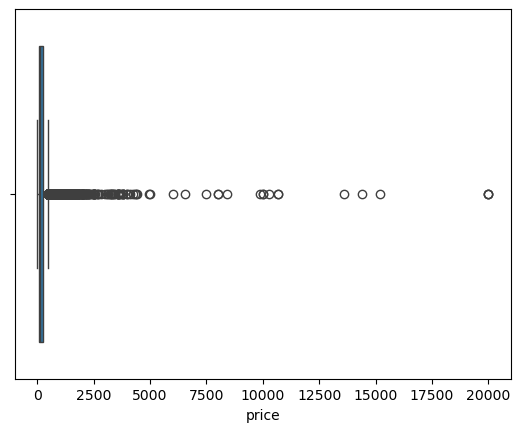

In [134]:
sns.boxplot(x=df['price'])


## In this data, extremely high prices may be luxury listings, not errors. Very low prices may be shared rooms or data entry mistakes.

In [ ]:
df['log_price'] = np.log1p(df['price'])

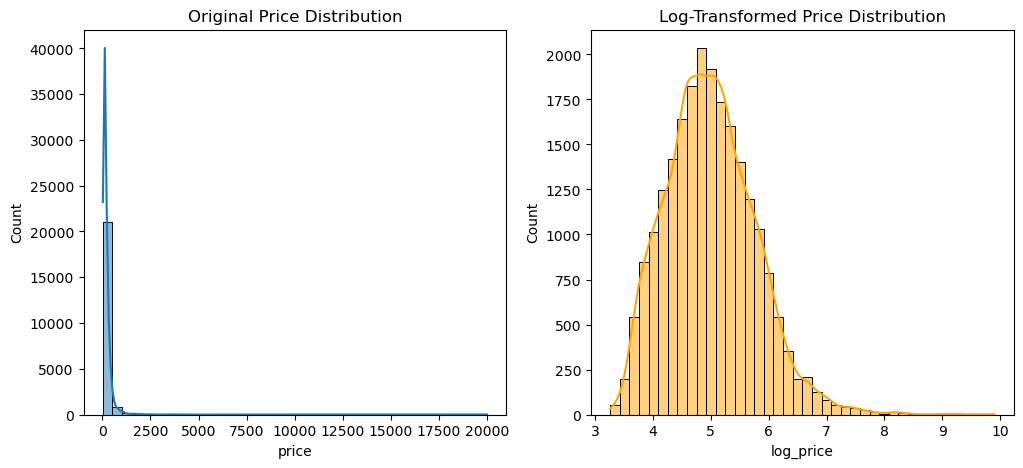

In [ ]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=40, kde=True)
plt.title('Original Price Distribution')

plt.subplot(1,2,2)
sns.histplot(df['log_price'], bins=40, kde=True, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.show()

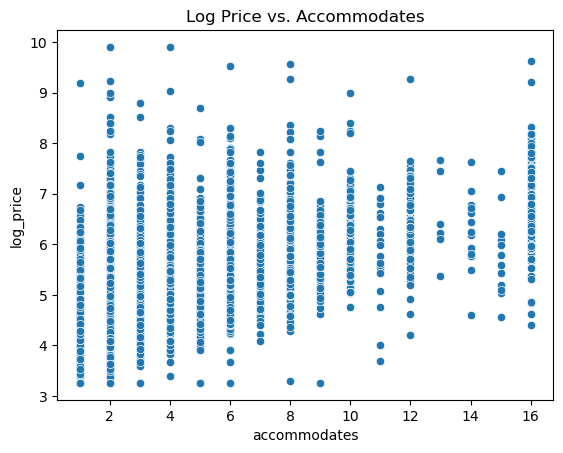

In [ ]:
sns.scatterplot(x='accommodates', y='log_price', data=df)
plt.title('Log Price vs. Accommodates')
plt.show()

## Price Determinants: Which factors (location, room type, number of reviews, amenities) most strongly relate to nightly price?

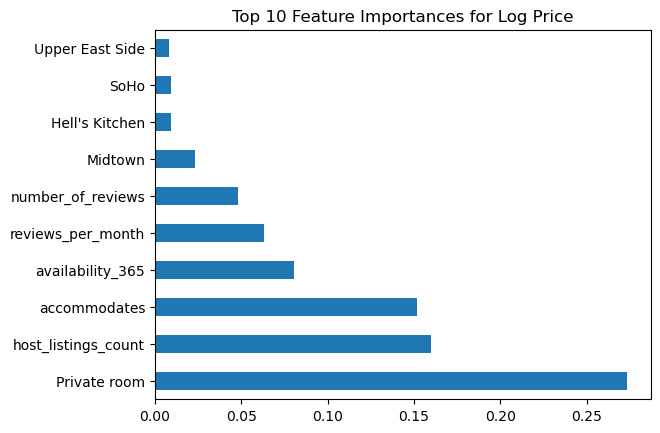

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

x = df[['accommodates', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'host_listings_count']]
x = pd.concat([x, pd.get_dummies(df['room_type']), pd.get_dummies(df['neighbourhood_cleansed'])], axis=1)

y = df['log_price']

rf = RandomForestRegressor(n_estimators=100, random_state=42)   
rf.fit(x, y)

importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances for Log Price')
plt.show()









## Host Activity: Do more experienced hosts (higher host_listings_count) charge differently or receive more reviews?

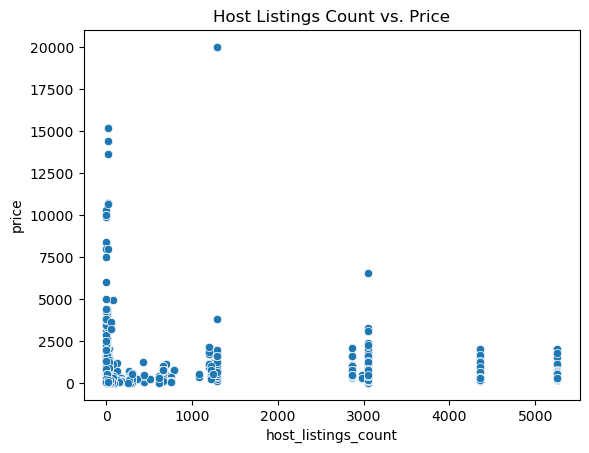

In [ ]:
sns.scatterplot(x='host_listings_count', y='price', data=df)
plt.title('Host Listings Count vs. Price')
plt.show()






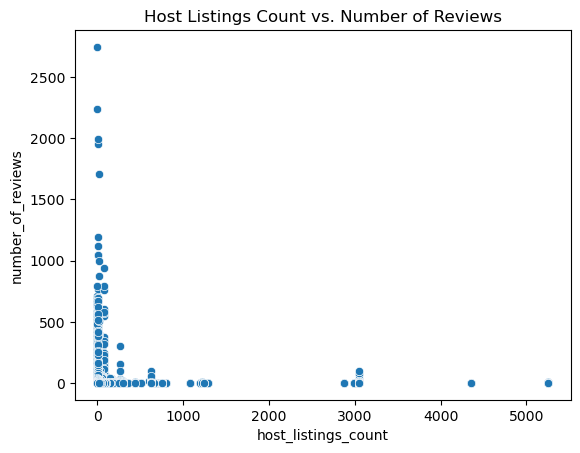

In [ ]:
sns.scatterplot(x='host_listings_count', y='number_of_reviews', data=df)
plt.title('Host Listings Count vs. Number of Reviews')
plt.show()

In [ ]:
print(df[['host_listings_count', 'log_price', 'number_of_reviews']].corr())

                     host_listings_count  log_price  number_of_reviews
host_listings_count             1.000000   0.351107          -0.137032
log_price                       0.351107   1.000000          -0.047957
number_of_reviews              -0.137032  -0.047957           1.000000


## Demand Seasonality: Is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?

In [ ]:
df['last_review'].unique()

<DatetimeArray>
['2013-05-10 00:00:00', '2023-12-09 00:00:00', '2023-08-30 00:00:00',
 '2025-02-21 00:00:00', '2025-01-03 00:00:00', '2024-10-05 00:00:00',
 '2022-06-05 00:00:00', '2024-12-01 00:00:00', '2025-02-28 00:00:00',
 '2024-07-31 00:00:00',
 ...
 '2024-06-25 00:00:00', '2024-04-18 00:00:00', '2023-06-16 00:00:00',
 '2024-03-19 00:00:00', '2023-06-22 00:00:00', '2024-02-25 00:00:00',
 '2024-02-20 00:00:00', '2024-01-29 00:00:00', '2024-01-28 00:00:00',
 '2024-02-21 00:00:00']
Length: 1691, dtype: datetime64[ns]

In [149]:
df['availability_60'].unique()

array([57,  0, 49, 18, 22, 17, 53, 33, 19, 15,  3,  2, 60, 59,  1, 58,  8,
       23, 54, 12, 35, 20, 28, 16, 26, 27, 55,  9, 10, 29,  4, 11, 30,  5,
       44, 36, 51, 56, 14, 32, 34, 47, 24, 39, 42, 21, 31, 37,  7, 25, 45,
       52, 46, 50, 43, 48,  6, 40, 41, 13, 38])

In [ ]:

# Extract year and month
df['review_year'] = df['last_review'].dt.year
df['review_month'] = df['last_review'].dt.month

<Figure size 1200x700 with 0 Axes>

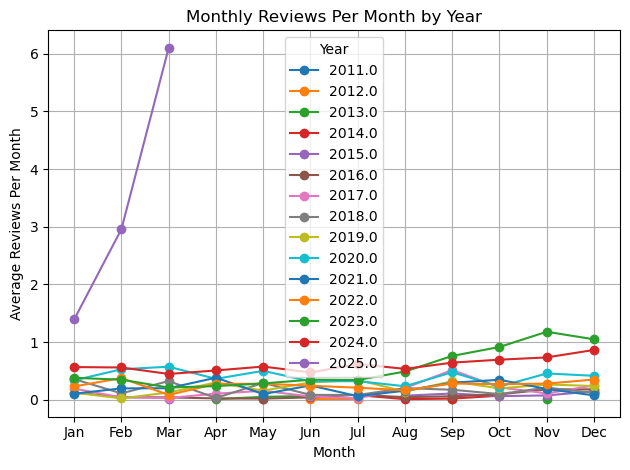

In [ ]:
# Group by year and month
monthly_yearly = (
    df.groupby(['review_year', 'review_month'])['reviews_per_month']
    .mean()
    .unstack(level=0)
    .reindex(index=range(1,13))  # Ensure all months are present
)

plt.figure(figsize=(12,7))
monthly_yearly.plot(marker='o')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Reviews Per Month by Year')
plt.xlabel('Month')
plt.ylabel('Average Reviews Per Month')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x2000 with 0 Axes>

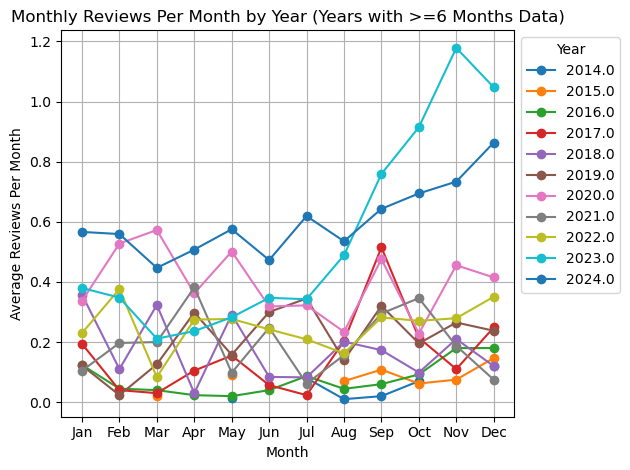

In [ ]:
# Count months per year
months_per_year = df.groupby('review_year')['review_month'].nunique()
full_years = months_per_year[months_per_year >= 6].index

# Filter to those years
monthly_yearly_filtered = monthly_yearly[full_years]

plt.figure(figsize=(12,20))
monthly_yearly_filtered.plot(marker='o')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Reviews Per Month by Year (Years with >=6 Months Data)')
plt.xlabel('Month')
plt.ylabel('Average Reviews Per Month')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_14701/985717977.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['reviews_per_month']


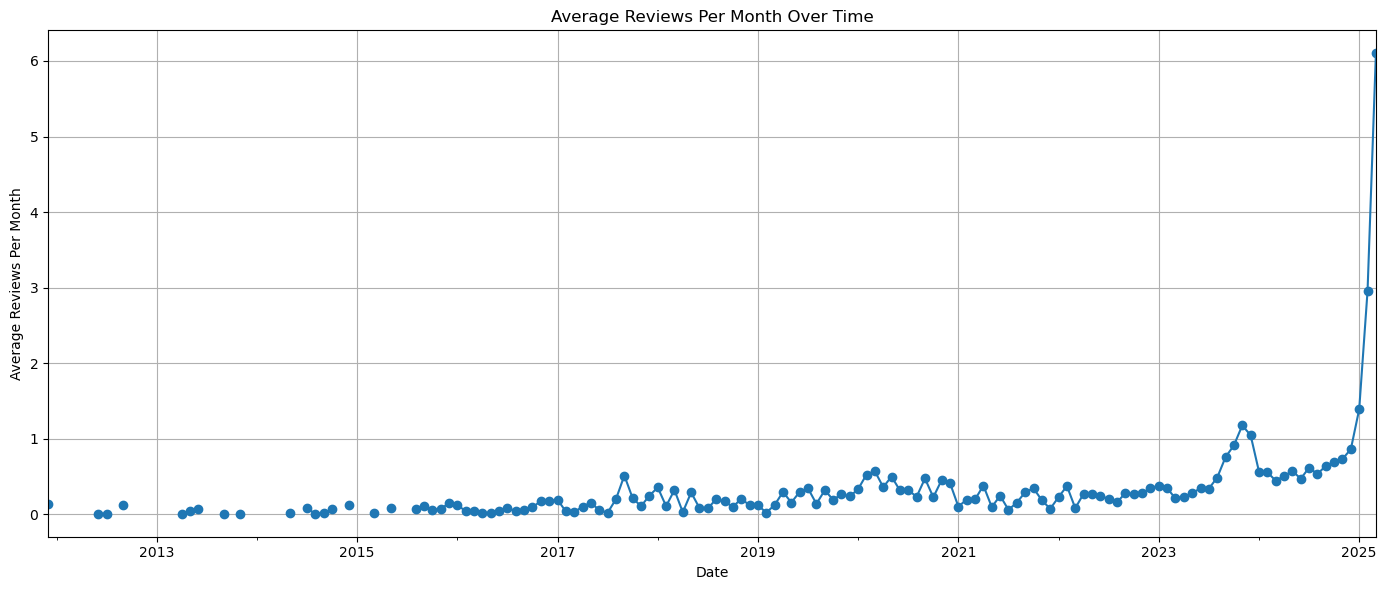

In [141]:
# Convert 'last_review' to datetime if not already
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Group by month (year + month), get mean
monthly_ts = (
    df
    .set_index('last_review')
    .resample('M')['reviews_per_month']
    .mean()
)

# Plot the time series
plt.figure(figsize=(14, 6))
monthly_ts.plot(marker='o')
plt.title('Average Reviews Per Month Over Time')
plt.xlabel('Date')
plt.ylabel('Average Reviews Per Month')
plt.grid(True)
plt.tight_layout()
plt.show()


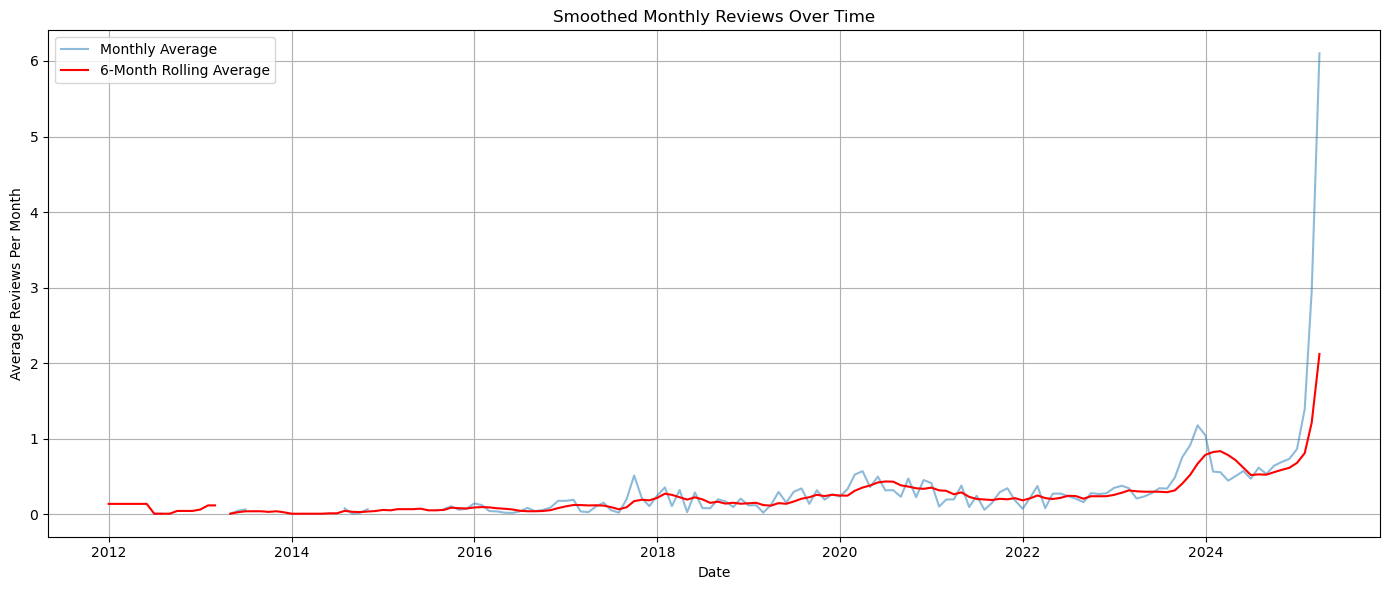

In [139]:
# Use same monthly_ts from Option 1
rolling_avg = monthly_ts.rolling(window=6, min_periods=1).mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_ts.index, monthly_ts, label='Monthly Average', alpha=0.5)
plt.plot(rolling_avg.index, rolling_avg, label='6-Month Rolling Average', color='red')
plt.title('Smoothed Monthly Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Average Reviews Per Month')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



/tmp/ipykernel_14701/3091586840.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


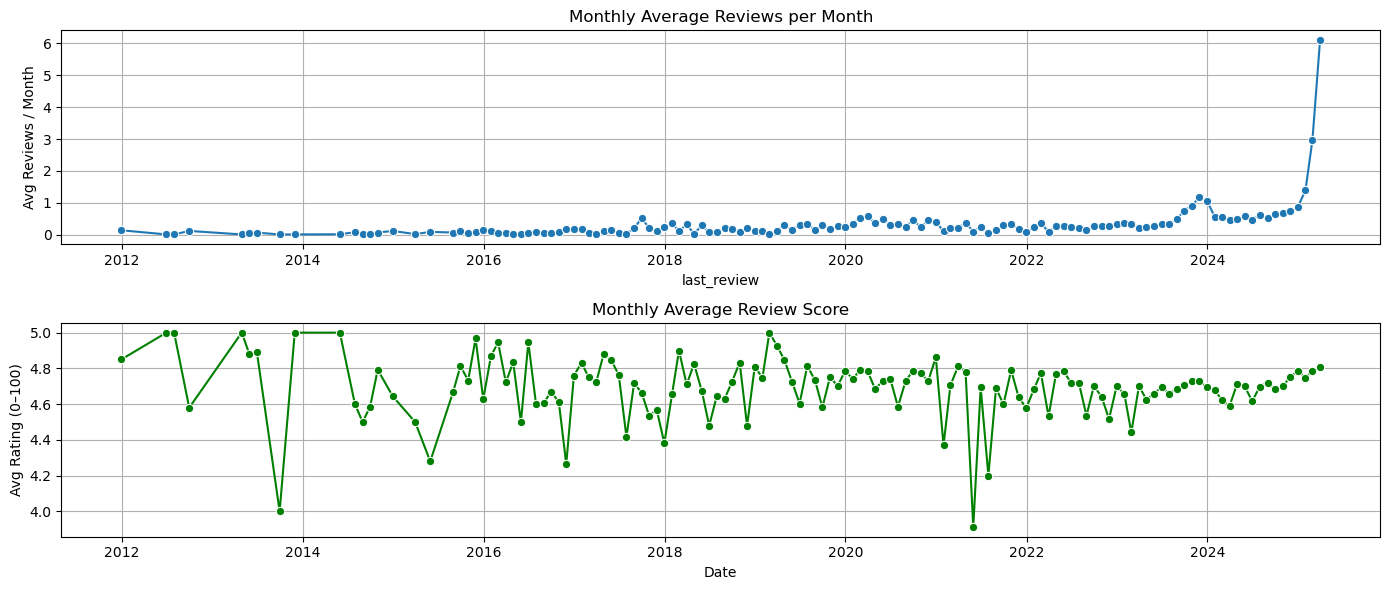

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure date columns are datetime
df['last_review']  = pd.to_datetime(df['last_review'],  errors='coerce')
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')

# 2. Drop rows missing the key metrics
df_ts = df.dropna(subset=['last_review', 'reviews_per_month', 'review_scores_rating'])

# 3. Set 'last_review' as index and resample by month
monthly = (
    df_ts
      .set_index('last_review')
      .resample('M')
      .agg({
          'reviews_per_month': 'mean',
          'review_scores_rating': 'mean',
          'number_of_reviews': 'sum'
      })
      .rename(columns={
          'reviews_per_month': 'avg_reviews_per_month',
          'review_scores_rating': 'avg_rating',
          'number_of_reviews': 'total_reviews'
      })
)

# 4. Plotting
plt.figure(figsize=(14, 6))

# Reviews per month
plt.subplot(2, 1, 1)
sns.lineplot(
    x=monthly.index,
    y=monthly['avg_reviews_per_month'],
    marker='o'
)
plt.title('Monthly Average Reviews per Month')
plt.ylabel('Avg Reviews / Month')
plt.grid(True)

# Rating over time
plt.subplot(2, 1, 2)
sns.lineplot(
    x=monthly.index,
    y=monthly['avg_rating'],
    marker='o',
    color='green'
)
plt.title('Monthly Average Review Score')
plt.ylabel('Avg Rating (0–100)')
plt.xlabel('Date')
plt.grid(True)

plt.tight_layout()
plt.show()


In [144]:
monthly_rating = (
    df_reviews.set_index('last_review')
    .resample('M')['review_scores_rating']
    .mean()
)

# Optional: cleanliness trend too
monthly_cleanliness = (
    df_reviews.set_index('last_review')
    .resample('M')['review_scores_cleanliness']
    .mean()
)

# Plot both
plt.figure(figsize=(14,6))
plt.plot(monthly_rating.index, monthly_rating, label='Overall Rating', marker='o')
plt.plot(monthly_cleanliness.index, monthly_cleanliness, label='Cleanliness Score', linestyle='--', color='green')
plt.title('Monthly Average Review Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Score (0–100)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'df_reviews' is not defined

In [137]:
df['last_review'].unique()

array(['2013-05-10', '2023-12-09', '2023-08-30', ..., '2024-01-29',
       '2024-01-28', '2024-02-21'], dtype=object)

In [136]:

df['year'] = df['last_review'].dt.year
df['month'] = df['last_review'].dt.month

# Group by year and month, aggregate reviews_per_month
monthly_reviews = (
    df.groupby(['year', 'month'])['reviews_per_month']
    .mean()
    .reset_index()
    .sort_values(['year', 'month'])
)

# Create a time-based x-axis
monthly_reviews['date'] = pd.to_datetime(dict(year=monthly_reviews.year, month=monthly_reviews.month, day=1))

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_reviews, x='date', y='reviews_per_month', marker='o')
plt.title('Average Monthly Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Average Reviews per Month')
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Filter for March 2015
march_2015_df = df[
    (df['last_review'].dt.year == 2015) &
    (df['last_review'].dt.month == 3)
].copy()

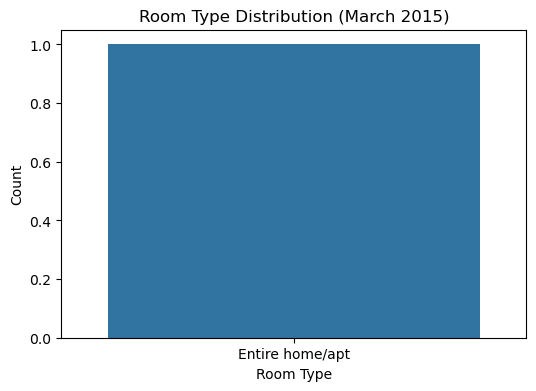

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='room_type', data=march_2015_df)
plt.title('Room Type Distribution (March 2015)')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

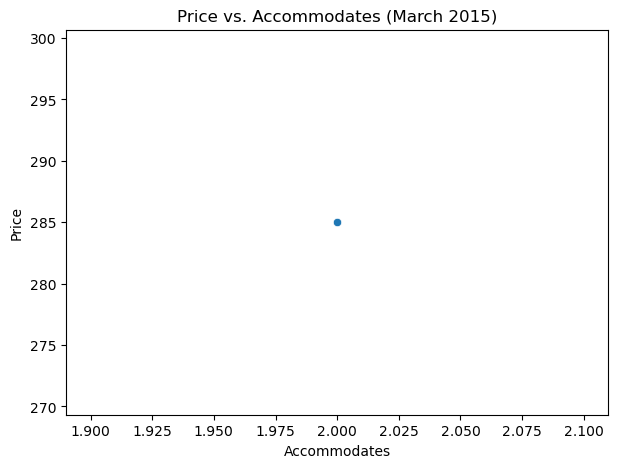

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='accommodates', y='price', data=march_2015_df)
plt.title('Price vs. Accommodates (March 2015)')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

In [ ]:
number_of_rows_2015_march = march_2015_df.shape[0]
print(f"Number of rows with last_review in March 2015: {number_of_rows_2015_march}")

Number of rows with last_review in March 2015: 1


##  Review Impact: How do review metrics (number_of_reviews, reviews_per_month, review_scores_rating) correlate with price and occupancy?

In [130]:
neigh_price = df.groupby('neighbourhood_cleansed')['log_price'].median()
df['neigh_log_price_mean'] = df['neighbourhood_cleansed'].map(neigh_price)

# 2. Select features for heatmap
selected = ['log_price', 'accommodates', 'bedrooms', 'bathrooms', 'reviews_per_month', 'availability_365', 'neigh_log_price_mean']
small_corr = df[selected].corr(method='spearman')
plt.figure(figsize=(8,6))
sns.heatmap(small_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap (Including Neighbourhood Median Price)')
plt.show()

KeyError: 'Column not found: log_price'

## Listing Characteristics: Are certain property types (e.g. entire home vs private room) more common in specific neighborhoods or price tiers?

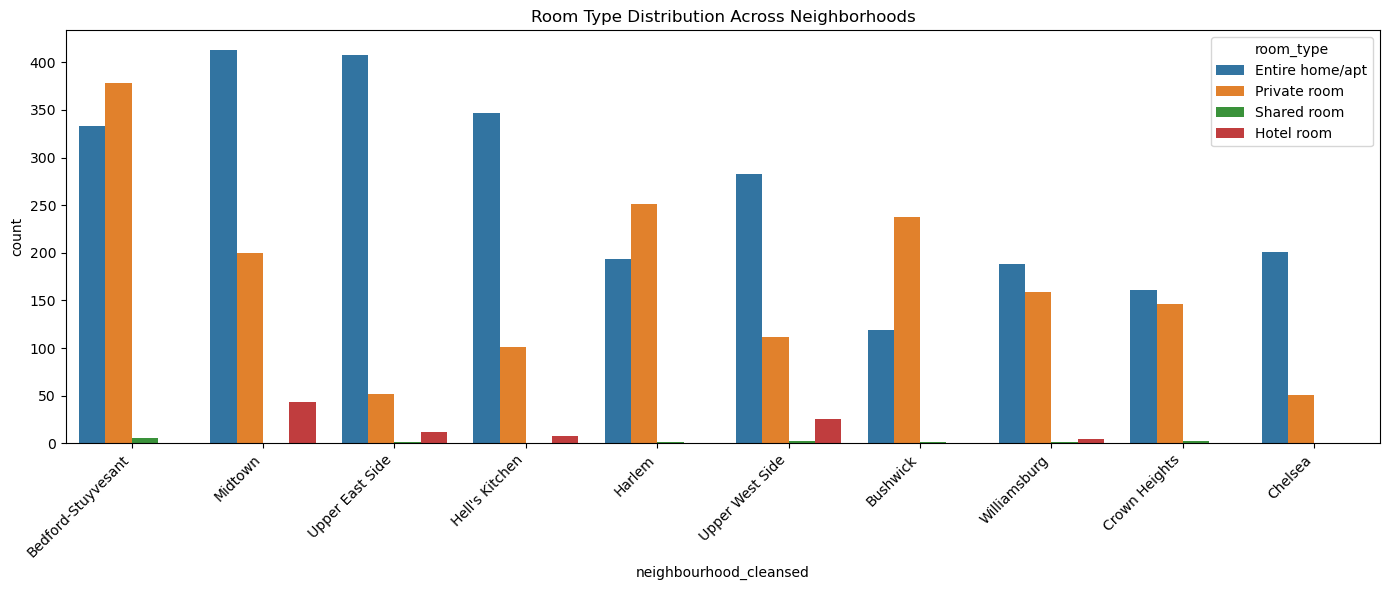

In [ ]:
sample_df = df.sample(n=10000, random_state=42)

plt.figure(figsize=(14, 6))
sns.countplot(data=sample_df, x='neighbourhood_cleansed', hue='room_type',
              order=sample_df['neighbourhood_cleansed'].value_counts().index[:10])  # Top 10 neighborhoods
plt.title('Room Type Distribution Across Neighborhoods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features (including location)
features = ['log_price', 'accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews', 'latitude', 'longitude']
X = df[features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# Add PCA results to DataFrame
df_pca = df.loc[X.index].copy()
df_pca['PC1'] = pcs[:, 0]
df_pca['PC2'] = pcs[:, 1]

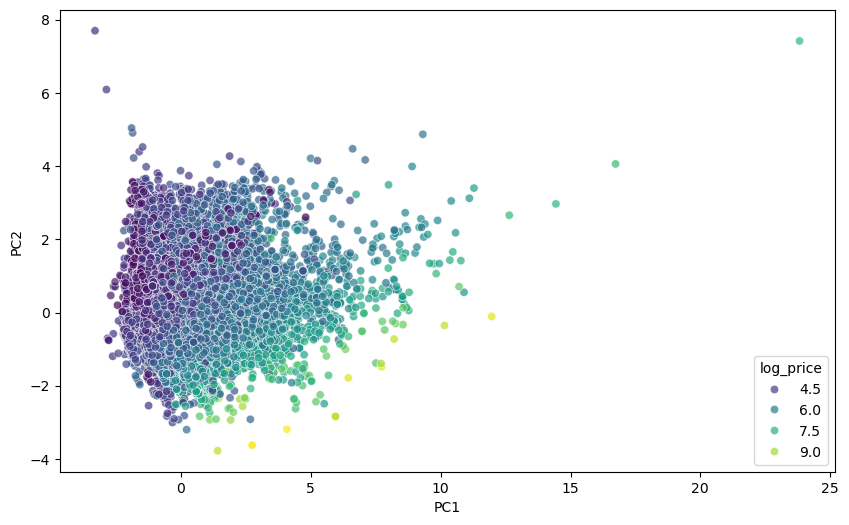

In [ ]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='log_price', data=df_pca, palette='viridis', alpha=0.7)
plt.show()

In [ ]:
import folium

# Center the map on the mean latitude and longitude of your listings
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add each listing as a circle marker
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Price: {row['price']}"  # You can customize this popup
    ).add_to(m)

# Save the map to an HTML file
m.save('airbnb_map.html')

In [ ]:
df['neighbourhood_cleansed'].iloc[3]

'Harlem'

In [ ]:
import folium

df1 = df.sample(random_state=42, n=500, ignore_index=True)
# Center of map (mean coordinates or fixed point)
center_lat = df1['latitude'].mean()
center_lon = df1['longitude'].mean()

# Create map object
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers
for idx, row in df1.iterrows():
    popup_text = f"""
    <b>Location:</b> {row.get('latitude', 'N/A')}<br>
    <b>Location:</b> {row.get('longitude', 'N/A')}<br>
    <b>Price:</b> {row.get('price', 'N/A')}<br>
    <b>Neighbourhood:</b> {row.get('neighbourhood_cleansed', 'N/A')}<br>
    <b>Review Score:</b> {row.get('review_scores_accuracy', 'N/A')}<br>
    <b>Review count:</b> {row.get('number_of_reviews', 'N/A')}<br>
    
    <b>Desctiption:</b> {row.get('description', 'N/A')}<br>

    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=row.get('address', 'Click for details')
    ).add_to(m)

# Save to HTML
m.save('apartments_map.html')


In [ ]:
df['description'].iloc[3]

'This is a very large and unique  space. An incredibly quiet apartment on one of the nicest blocks in Manhattan. Its a very spacious (800 sq ft)  home with an 800 sq ft garden /patio with right outside your bedroom door ! Despite the country-quiet, you are only 100 feet away from the subway which gets you in to the center of Manhattan in 8-10 minutes..'

## Let's do text summarizer for description column since not many people are gonna read the whole description of apartaments, during the search. Just the keywords and reasonable summary would be sufficinet.

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
df['property_type'].unique()

array(['Private room in rental unit', 'Private room in condo',
       'Private room in home', 'Entire home', 'Entire rental unit',
       'Private room in guest suite', 'Entire place', 'Entire loft',
       'Entire condo', 'Private room in townhouse', 'Entire townhouse',
       'Private room in bed and breakfast', 'Entire serviced apartment',
       'Private room in loft', 'Entire guesthouse', 'Entire guest suite',
       'Private room in houseboat', 'Room in boutique hotel',
       'Private room', 'Shared room in rental unit', 'Boat',
       'Room in serviced apartment', 'Private room in villa',
       'Private room in religious building', 'Casa particular',
       'Shared room in home', 'Shared room in townhouse',
       'Private room in tiny home', 'Entire bungalow', 'Room in hotel',
       'Private room in guesthouse', 'Houseboat', 'Shared room in condo',
       'Entire cottage', 'Tiny home', 'Shared room in loft',
       'Private room in serviced apartment', 'Room in aparthotel',
